# 📝 Exercise M5.02

The aim of this exercise is to find out whether a decision tree model is able
to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the range
of feature values seen during the training.

We first load the regression data.

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create two models, a linear regression model and a decision tree
regression model, and fit them on the training data. Limit the depth at 3
levels for the decision tree.

In [2]:
# Write your code here.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

tree_model = DecisionTreeRegressor(max_depth=3)
linear_model = LinearRegression()

tree_model.fit(data_train, target_train)
linear_model.fit(data_train, target_train)

LinearRegression()

Create a synthetic dataset containing all possible flipper length from the
minimum to the maximum of the training dataset. Get the predictions of each
model using this dataset.

In [4]:
# Write your code here.
import numpy as np

data_test = pd.DataFrame(
    np.arange(data_train[feature_name].min(), data_train[feature_name].max()),
    columns=[feature_name],
)

Create a scatter plot containing the training samples and superimpose the
predictions of both models on the top.

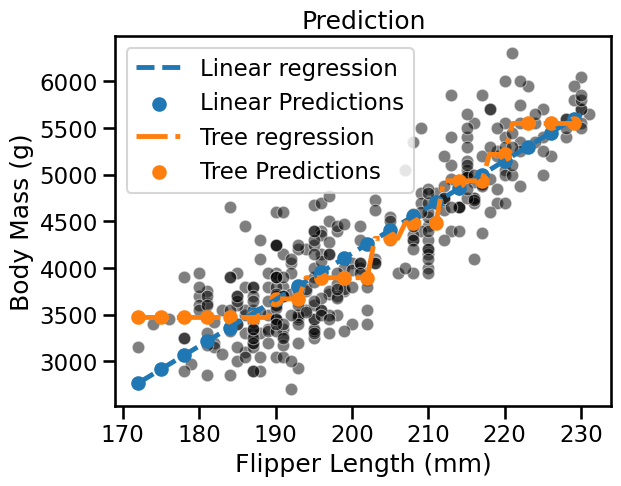

In [5]:
# Write your code here.
target_linear_predicted = linear_model.predict(data_test)
target_tree_predicted = tree_model.predict(data_test)

import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
plt.plot(
    data_test[feature_name],
    target_linear_predicted,
    label="Linear regression",
    linestyle="--",
)
plt.scatter(
    data_test[::3],
    target_linear_predicted[::3],
    label="Linear Predictions",
    color="tab:blue",
)

plt.plot(
    data_test[feature_name],
    target_tree_predicted,
    label="Tree regression",
    linestyle="-.",
)
plt.scatter(
    data_test[::3],
    target_tree_predicted[::3],
    label="Tree Predictions",
    color="tab:orange",
)

plt.legend()
_ = plt.title("Prediction")

Now, we check the extrapolation capabilities of each model. Create a dataset
containing a broader range of values than your previous dataset, in other
words, add values below and above the minimum and the maximum of the flipper
length seen during training.

In [7]:
# Write your code here.
data_test = pd.DataFrame(
    np.arange(data_train[feature_name].min()-10, data_train[feature_name].max()+10),
    columns=[feature_name],
)


Finally, make predictions with both models on this new interval of data.
Repeat the plotting of the previous exercise.

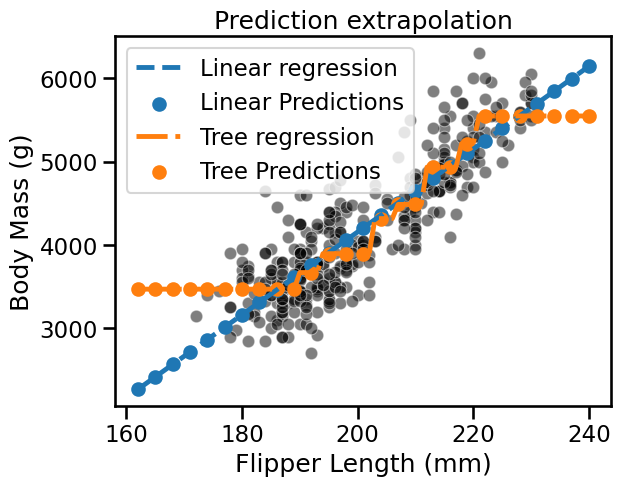

In [8]:
# Write your code here.

target_linear_predicted = linear_model.predict(data_test)
target_tree_predicted = tree_model.predict(data_test)

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
plt.plot(
    data_test[feature_name],
    target_linear_predicted,
    label="Linear regression",
    linestyle="--",
)
plt.scatter(
    data_test[::3],
    target_linear_predicted[::3],
    label="Linear Predictions",
    color="tab:blue",
)

plt.plot(
    data_test[feature_name],
    target_tree_predicted,
    label="Tree regression",
    linestyle="-.",
)
plt.scatter(
    data_test[::3],
    target_tree_predicted[::3],
    label="Tree Predictions",
    color="tab:orange",
)

plt.legend()
_ = plt.title("Prediction extrapolation")